In [8]:
import pandas as pd
# data cleaning starts

# removing negative guests
df_bookings=pd.read_csv('dataset/fact_bookings.csv')
# print(df_bookings.shape) before removing size
df_bookings=df_bookings[df_bookings['no_guests']>0]
# after removing size
df_bookings.shape

(134578, 12)

In [9]:
# checking the mean and max rev and min rev

# we can see how the highest revenue is there which is too much so its an outlier
df_bookings['revenue_generated'].mean(),df_bookings['revenue_generated'].min(),df_bookings['revenue_generated'].max()

(15378.036937686695, 6500, 28560000)

In [10]:
# finding avg/mean and std dev of rev gen

avg,std=df_bookings['revenue_generated'].mean(),df_bookings['revenue_generated'].std()

avg,std

(15378.036937686695, 93040.1549314641)

In [11]:
# accoding to a rule :
# 65-70% of data lies in 1 std dev from mean
# 95% in 2 std dev from mean
# 99.7% in 3 std dev from mean

# so any data point lies outside of that is an outlier

pos_outlier_boundary=avg+std*3
neg_outlier_boundary=avg-std*3

pos_outlier_boundary,neg_outlier_boundary

(294498.50173207896, -263742.4278567056)

In [12]:
# check wheather we have negative values for rev gen col
df_bookings[df_bookings['revenue_generated']<0]<0

# we can see 0 rows means no problem in negative outliers

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [13]:
# lets remove all positive outliers

# detecting positive outliers

df_bookings[df_bookings['revenue_generated']>pos_outlier_boundary]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [14]:
# removing them
df_bookings=df_bookings[df_bookings['revenue_generated']<pos_outlier_boundary]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [15]:
# describe() can be called on series as well as on dataframe

df_bookings['revenue_realized'].describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [16]:
updated_mean,updated_std=df_bookings['revenue_realized'].mean(),df_bookings['revenue_realized'].std()

updated_mean,updated_std

(12695.983585117372, 6927.791692242814)

In [17]:
updated_rev_gen=updated_mean+updated_std*3

updated_rev_gen

33479.358661845814

In [18]:
# but in describe we can see rev_realized col max value is 45220 but 3*std+avg is coming at 33479 then 45220 is it outlier?

# lets see how many rec are above 33479

df_bookings[df_bookings['revenue_realized']>updated_rev_gen]

# around 1299 records have rev > 33479

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [19]:
# lets see room categories
df_rooms=pd.read_csv("dataset/dim_rooms.csv")
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [20]:
# presedential is the highest type

# lets see the mean value of rev realized for rooms of category presendential

df_bookings[df_bookings['room_category']=='RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [21]:
df_hotels=pd.read_csv("dataset/dim_hotels.csv")

df_hotels.dtypes

property_id       int64
property_name    object
category         object
city             object
dtype: object

In [22]:
# again checking
9048*3+23439

# which means all values within this will be valid hence 45000 is within this which is not outlier

50583

In [23]:
# checking wheather important columns have null values
df_bookings.isnull().sum()

# ratings contain 77k null values but its not important as many people will not rate

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [24]:
df_agg_bookings=pd.read_csv("dataset/fact_aggregated_bookings.csv")

# checking which cols in agg_bookings have null value
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [25]:
# now we should replace 2 records of column capacity which contains null with mean

# hence find the mean
avg_capacity=df_agg_bookings['capacity'].mean()

avg_capacity

25.280495759947815

In [26]:
# replacing null in capacity column with avg cap

# df_name.loc[condn,col_to_be_replaced]=value_to_be_replaced

df_agg_bookings.loc[df_agg_bookings['capacity'].isnull()==True,'capacity']=avg_capacity

In [27]:
# again checking for null 

df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [28]:
# creating and adding a new col called occ_rate

df_agg_bookings['occ_rate']=df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']

df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_rate
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [29]:
# round(value,decimal_places_to_be_rounded)

# apply()->takes a function and applies that to each value in a column

# x->gets the value of each row in column occ_rate
df_agg_bookings['occ_rate']=df_agg_bookings['occ_rate'].apply(lambda x:round(x*100,2))

df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_rate
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


In [ ]:
df_rooms

In [37]:
# 1)trying to find out the avergae occupancy rate as per room_category

# group the agg_bookings table as per unique room categories and find the avg occupancy and round it of to
# 2 decimal digits and finally sort the results

# groupby initially divides the table into 4 partitions rt1,rt2,rt3,rt4

# then it will find the avg occ_rate of each of those room_categories and finally round it off to 2 decimal place and sort

room_cat_mean_occ_pt=df_agg_bookings.groupby('room_category')['occ_rate'].mean().round(2).sort_values(ascending=False)

room_cat_mean_occ_pt

room_category
RT4    59.30
RT1    58.23
RT2    58.04
RT3    58.03
Name: occ_rate, dtype: float64

In [44]:
# here we got room category and avg occupancy

# but we need occupancy with room_class so we can merge the above df with df_rooms as it contains column room_class

merged_table=pd.merge(room_cat_mean_occ_pt,df_rooms,left_on='room_category',right_on='room_id')

merged_table

,occ_rate,room_id,room_class
0,59.30,RT4,Presidential
1,58.23,RT1,Standard
2,58.04,RT2,Elite
3,58.03,RT3,Premium


In [46]:
# removing room_id from above

merged_table.drop('room_id',axis=1,inplace=True)

merged_table

,occ_rate,room_class
0,59.30,Presidential
1,58.23,Standard
2,58.04,Elite
3,58.03,Premium


In [55]:
# 2)trying to find the average occupancy according to city

# city data is in df_hotels and occupancy data is in df_agg_bookings 

# so merge them

merged_city=pd.merge(df_agg_bookings,df_hotels,on='property_id')

<Axes: xlabel='city'>

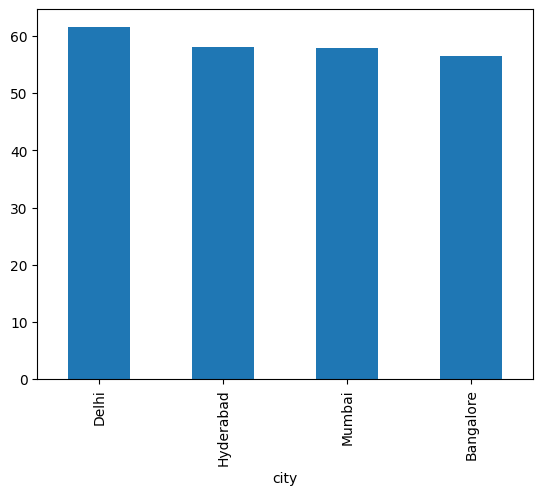

In [59]:
# now aggregating or grouping them according to city and finding the average mean

merged_city.groupby('city')['occ_rate'].mean().sort_values(ascending=False).plot(kind='bar')

In [63]:
# 3)checking the occupancy weekend vs weekday
df_date=pd.read_csv("dataset/dim_date.csv")

merged_date=pd.merge(df_agg_bookings,df_date,left_on='check_in_date',right_on='date')

merged_date

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_rate,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,10-May-22,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...
6495,16563,31-Jul-22,RT4,13,18.0,72.22,31-Jul-22,Jul 22,W 32,weekend
6496,16559,31-Jul-22,RT4,13,18.0,72.22,31-Jul-22,Jul 22,W 32,weekend
6497,17558,31-Jul-22,RT4,3,6.0,50.00,31-Jul-22,Jul 22,W 32,weekend
6498,19563,31-Jul-22,RT4,3,6.0,50.00,31-Jul-22,Jul 22,W 32,weekend


In [66]:
merged_date.groupby('day_type')['occ_rate'].mean().round(2)

day_type
weekeday    50.90
weekend     72.39
Name: occ_rate, dtype: float64